In [7]:
# matplotlib에 한글 폰트 적용하기. 
# 그래프에서 한글폰트 깨지지 않게 해줍니다.
import matplotlib
import matplotlib.font_manager as fm
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

# font_list = fm.findSystemFonts(fontpaths=None, fontext ='ttf')
# for i in range(200) : print(i,':', font_list[i])

In [ ]:
# 표 불러와 정리하기. 이렇게 하는 이유는 어떤 표를 넣어도 거의 같은 코드로 빠르게 가공할 수 있기 때문.
# 이 과정이 너무 어렵다면 엑셀에서 직접 작업해서 불러와도 된다.

# 불러올 엑셀 파일을 열어서 다른이름으로 저장 → 파일 형식을 CSV UTF8로 설정하고 저장합니다.

#1 데이터 관리 라이브러리인 pandas를 불러온다.
import pandas as pd

#2 df1 이라는 변수에 파일을 읽어오기.(파일을 같은 폴더에 두면 경로 생략 가능) *df는 dataframe의 약자로 pandas에서 자주쓰는 표현이다.
# skiprows(행 버리기, skip rows) 2,3,5,6,8,9,11,12 행을 버리고 불러온다. 통계 파일에서는 남녀 부분이다.
# thousands = ',' 부분은 숫자의 천단위에서 ,(콤마)가 있는 경우 지워줍니다. 이렇게 해야 정상적으로 숫자로 읽어줍니다.
df1 = pd.read_csv('우리나라 사망원인별 통계.csv', skiprows=[2,3,5,6,8,9,11,12], thousands = ',')

#3 쓸모 없는 열 버리기. 열이름을 배열로 버릴 수 있다. (예: ['이름1','이름2'], https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html 참고) 
df1 = df1.drop(columns=['성별'])

#4 행렬 뒤집고 컬럼 이름 재설정하기 (https://lemontia.tistory.com/897 참고)
df1 = df1.transpose()
df1 = df1.rename(columns=df1.iloc[0]) #iloc은 표를 행별 배열로 보게 해준다. 즉 iloc은 첫 번째 행
df1 = df1.drop(df1.index[0]) # index가 0인 첫 번째 행을 버린다.

#5 문자로된 날짜 형식의 데이터로 바꿔준다. 
# .to_period('m') 월 간격으로 표시. 이 부분을 지우면 1995-01-01 처럼 모두 1일이 붙어서 나온다.
df1.index = pd.to_datetime(df1.index, format="%Y. %m").to_period('m')

#6 내부의 데이터들을 정수로 바꿔주기
df1 = df1.astype(int)

# 완성된 테이블 확인
df1

,당뇨병 (E10-E14),고혈압성 질환 (I10-I13),폐렴 (J12-J18),나머지 호흡계통 질환 (Re. J00- J98)
1995-01,643,855,181,197
1995-02,673,824,155,211
1995-03,787,928,209,245
1995-04,687,788,164,172
1995-05,654,792,167,173
...,...,...,...,...
2019-08,600,457,1843,547
2019-09,583,419,1789,603
2019-10,694,444,1948,613
2019-11,698,489,1982,609


<AxesSubplot:>

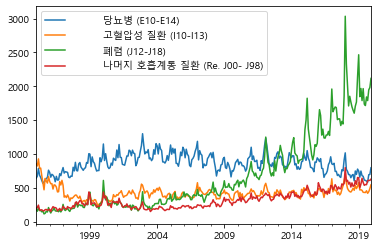

In [ ]:
# 그래프 그리기. 위의 셀을 먼저 실행한 뒤에 실행하세요.
df1.plot()

In [ ]:
# 1번 표 연도별로 합산해 집계해보기
df1 = df1.groupby(df1.index.year).sum()
df1

,당뇨병 (E10-E14),고혈압성 질환 (I10-I13),폐렴 (J12-J18),나머지 호흡계통 질환 (Re. J00- J98)
1995,7873,8391,1923,2199
1996,8061,6426,1940,2239
1997,8804,4525,2329,2580
1998,9910,3959,3095,3434
1999,10354,3594,3206,3194
2000,10808,4252,3904,3632
2001,11466,4898,2920,3083
2002,12150,5150,2732,2540
2003,12164,5185,2810,2180
2004,11820,5049,3506,2290


<AxesSubplot:>

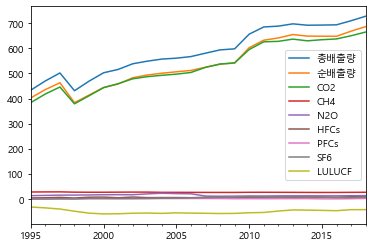

In [ ]:
# 다른 표 불러오기

#0 불러올 엑셀 파일을 열어서 다른이름으로 저장 → 파일 형식을 CSV UTF8로 설정하고 저장합니다.

#1 df2 라는 변수에 파일을 읽어오기. (df1을 앞에서 썼으므로 df2로 해주었다)
# keep_default_na=False, na_values=['-'] : 숫자 대신에 " - "라고 써있는 부분을 비어있는 값으로 인식하도록 설정
df2 = pd.read_csv('우리나라 온실가스 통계.csv', thousands = ',', keep_default_na=False, na_values=['-'])

#2 행렬 뒤집고 컬럼 이름 재설정하기
df2 = df2.transpose()
df2 = df2.rename(columns=df2.iloc[0]) #iloc은 표를 행별 배열로 보게 해준다. (즉, iloc은 첫 번째 행)
df2 = df2.drop(df2.index[0]) # index가 0인 첫 번째 행을 버리기

#3 문자로된 날짜 형식의 데이터로 바꿔주기
# to_period('y') : 1년 간격으로 표시
df2.index = pd.to_datetime(df2.index, format="%Y").to_period('y')

#4 df2의 비어있는 값을 채우기
df2 = df2.fillna(method='bfill')

#5 내부의 데이터들을 실수로 바꿔주기
df2 = df2.astype(float)

#6 df2에서는 1994년 이전 지우기
df2 = df2.drop(df2.index[:5])

# 완성된 표를 그래프로 그리기
df2.plot()

In [ ]:
# 무상관 검정 해보기

from scipy import stats

# print(df1.columns) 열 이름을 찾기 어렵다면 이것을 사용해서 출력된 값에서 복사 붙여넣기합니다.
# df1(질병 별 사망자수)의 폐렴 부분을 y값으로 하고 2019년도 제외
y = list(df1["　　　폐렴 (J12-J18)"][:-1])

# df2(온실가스)의 총배출량 부분을 x값으로
x = list(df2['총배출량'])

corr, pvalue = stats.pearsonr(x,y) #무상관 검정
print('공분산(corr. coef)=',corr)
print('p값(p value) =',pvalue)

# p값이 귀무가설 검정 때 우연히 일어날 확률로 설정했던 값보다 크다면 우연히 일어나지 않았다는 증명이 됩니다.


NameError: name 'df1' is not defined

In [ ]:
#산점도로 그려보기

import matplotlib.pyplot as plt

plt.scatter(x,y)

NameError: name 'x' is not defined